In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_stata('prodfn_data_6_7.dta')

df.head()

,ivar,tvar,k,l,y
0,1,1.0,-0.247419,1.042258,0.539103
1,1,2.0,0.608960,0.784276,1.784491
2,1,3.0,0.594863,0.951537,1.656589
3,1,4.0,0.419883,0.735057,1.127437
4,1,5.0,0.516545,1.125291,1.863850


In [3]:
df.shape

(3020, 5)

In [4]:
df.tvar.unique().shape

(5,)

In [5]:
df.ivar.unique().shape

(604,)

In [6]:
np.arange(df.shape[0], step = 5)

array([   0,    5,   10,   15,   20,   25,   30,   35,   40,   45,   50,
         55,   60,   65,   70,   75,   80,   85,   90,   95,  100,  105,
        110,  115,  120,  125,  130,  135,  140,  145,  150,  155,  160,
        165,  170,  175,  180,  185,  190,  195,  200,  205,  210,  215,
        220,  225,  230,  235,  240,  245,  250,  255,  260,  265,  270,
        275,  280,  285,  290,  295,  300,  305,  310,  315,  320,  325,
        330,  335,  340,  345,  350,  355,  360,  365,  370,  375,  380,
        385,  390,  395,  400,  405,  410,  415,  420,  425,  430,  435,
        440,  445,  450,  455,  460,  465,  470,  475,  480,  485,  490,
        495,  500,  505,  510,  515,  520,  525,  530,  535,  540,  545,
        550,  555,  560,  565,  570,  575,  580,  585,  590,  595,  600,
        605,  610,  615,  620,  625,  630,  635,  640,  645,  650,  655,
        660,  665,  670,  675,  680,  685,  690,  695,  700,  705,  710,
        715,  720,  725,  730,  735,  740,  745,  7

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


# Example usage
custom_cmap = LinearSegmentedColormap.from_list('mymap', ['#c7adff', '#13003b'], N=256)



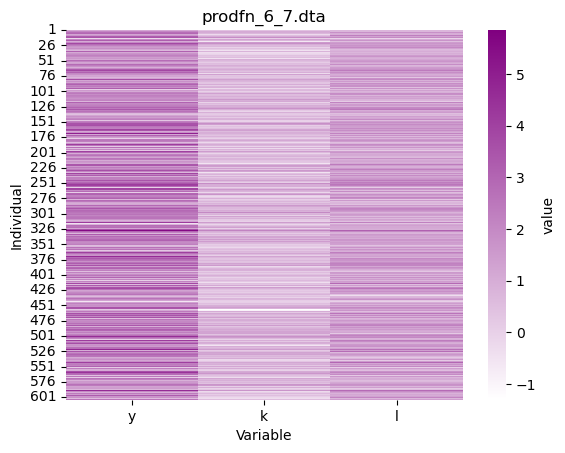

In [8]:
plt.title('prodfn_6_7.dta')
sns.heatmap(df[['y', 'k', 'l']],
            cmap = LinearSegmentedColormap.from_list('mymap', ['white', 'Purple'], N=256), cbar_kws={'label': 'value'})

plt.yticks(ticks=np.arange(df.shape[0], step = 5)[::25], labels = df.ivar.unique()[::25])
plt.ylabel('Individual')
plt.xlabel('Variable')
plt.show()

In [9]:
# Invert the log
edf = df.copy()
edf[['k', 'l', 'y']] = np.exp(edf[['k', 'l', 'y']])

edf

,ivar,tvar,k,l,y
0,1,1.0,0.780814,2.835613,1.714468
1,1,2.0,1.838518,2.190821,5.956549
2,1,3.0,1.812783,2.589688,5.241400
3,1,4.0,1.521784,2.085600,3.087731
4,1,5.0,1.676227,3.081112,6.448515
...,...,...,...,...,...
3015,604,1.0,0.585238,6.022049,3.643750
3016,604,2.0,1.652380,3.584095,12.793126
3017,604,3.0,3.135551,8.805492,18.638611
3018,604,4.0,1.722448,3.963582,13.081767


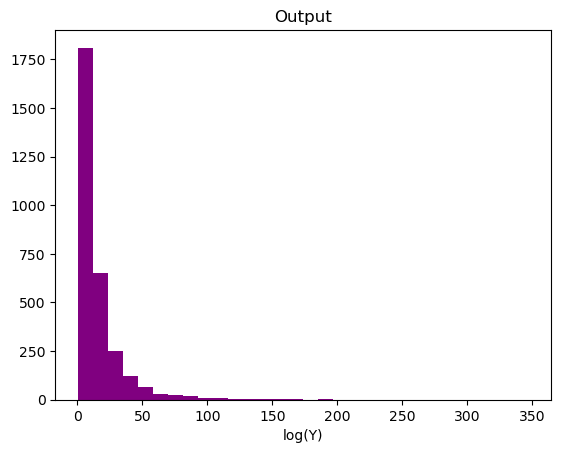

In [10]:
plt.title('Output')
plt.hist(np.exp(df.y), color = 'purple', bins = 30)
plt.xlabel('log(Y)')
plt.show()

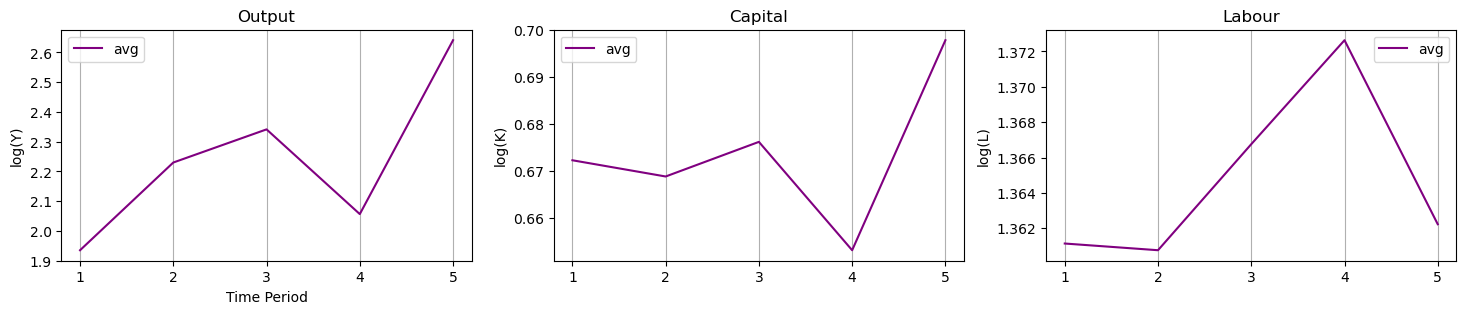

In [11]:
plt.figure(figsize=(18, 3))
plt.subplot(131)
plt.title('Output')
plt.plot(df.groupby('tvar').mean().y, c = 'purple', label = 'avg')
plt.ylabel('log(Y)')
plt.xlabel('Time Period')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')
plt.legend()

plt.subplot(132)
plt.title('Capital')
plt.plot(df.groupby('tvar').mean().k, c = 'purple', label = 'avg')
plt.ylabel('log(K)')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')
plt.legend()

plt.subplot(133)
plt.title('Labour')
plt.plot(df.groupby('tvar').mean().l, c = 'purple', label = 'avg')
plt.ylabel('log(L)')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')
plt.legend()

plt.show()

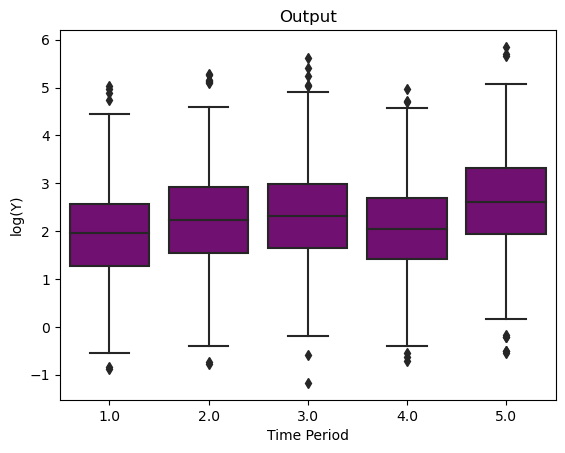

In [12]:
plt.title('Output')

sns.boxplot(y = 'y', x = 'tvar', data = df, color = 'purple')

plt.ylabel('log(Y)')
plt.xlabel('Time Period')

plt.show()

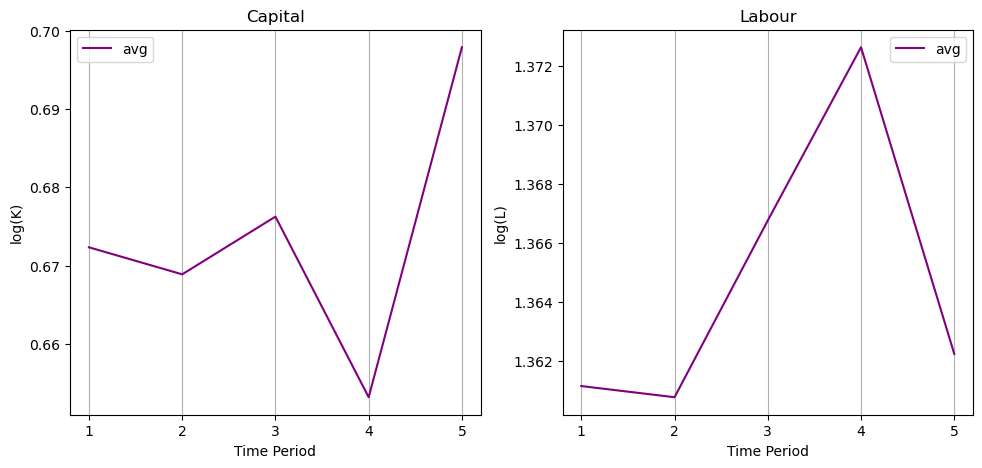

In [13]:
plt.figure(figsize=(18, 5))
plt.subplot(131)
plt.title('Capital')
plt.plot(df.groupby('tvar').mean().k, c = 'purple', label = 'avg')
plt.ylabel('log(K)')
plt.xlabel('Time Period')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')
plt.legend()

plt.subplot(132)
plt.title('Labour')
plt.plot(df.groupby('tvar').mean().l, c = 'purple', label = 'avg')
plt.ylabel('log(L)')
plt.xlabel('Time Period')
plt.xticks([1, 2, 3, 4, 5])
plt.grid(axis = 'x')
plt.legend()

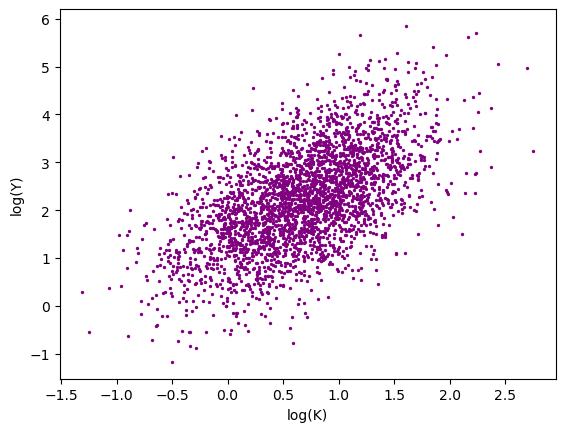

In [26]:
plt.scatter(df.k, df.y, c = 'purple', s = 2)

plt.ylabel('log(Y)')
plt.xlabel('log(K)')
plt.show()

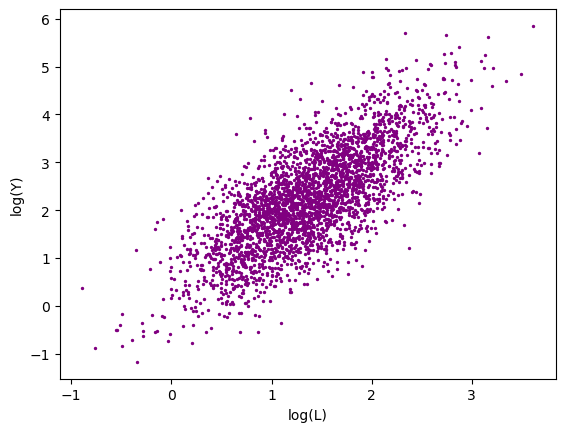

In [24]:
plt.scatter(df.l, df.y, c = 'purple', s = 2)

plt.ylabel('log(Y)')
plt.xlabel('log(L)')

plt.show()

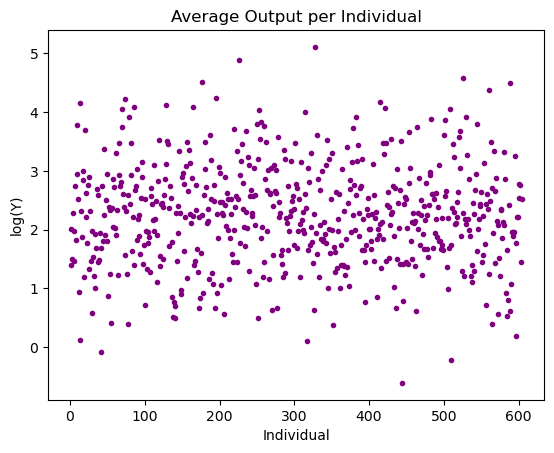

In [16]:
plt.title('Average Output per Individual')

plt.plot(df.groupby('ivar').mean().y, '.', c = 'purple', label = 'Average')

plt.ylabel('log(Y)')
plt.xlabel('Individual')

plt.show()

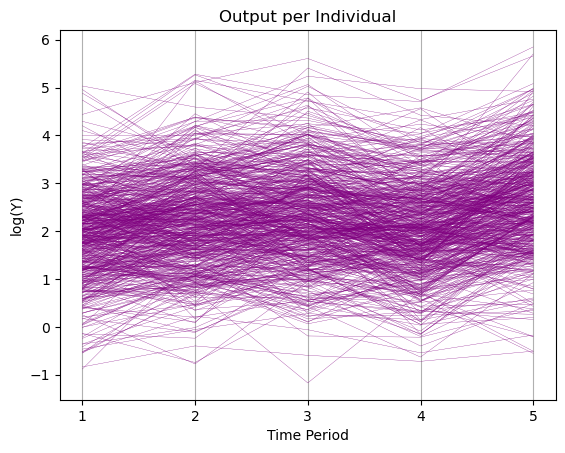

In [17]:

plt.title('Output per Individual')

for i in df.ivar.unique():
    plt.plot(np.arange(1, 6), df.loc[df.ivar == i].y, c = 'purple', lw = 0.2)

plt.ylabel('log(Y)')
plt.xlabel('Time Period')

plt.xticks(np.arange(1, 6))

plt.grid(axis = 'x')

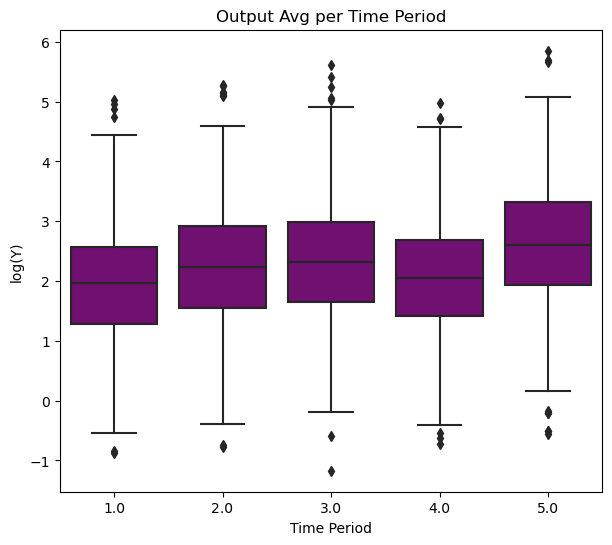

In [18]:
plt.figure(figsize=(7, 6))
plt.title('Output Avg per Time Period')

sns.boxplot(y = 'y', x = 'tvar', data = df, color = 'purple')

plt.ylabel('log(Y)')
plt.xlabel('Time Period')

plt.show()

<AxesSubplot: title={'center': 'Correlation Heatmap'}>

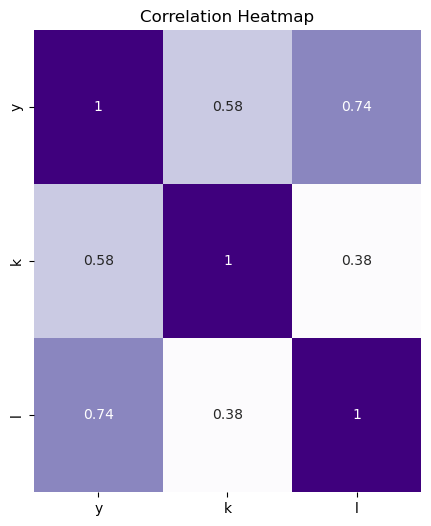

In [19]:
plt.figure(figsize=(5,6))
plt.title('Correlation Heatmap')
sns.heatmap(df[['y', 'k', 'l']].corr(), cmap = 'Purples', annot = True, cbar = False)

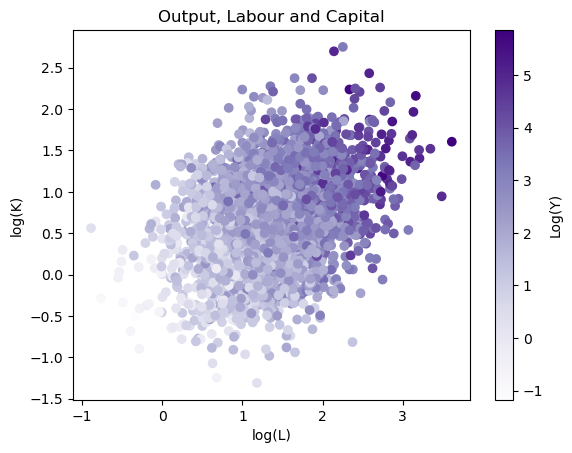

In [20]:
plt.title('Output, Labour and Capital')

plt.scatter(df.l, df.k, c = df.y, cmap = 'Purples')

plt.colorbar().set_label('Log(Y)')

plt.ylabel('log(K)')
plt.xlabel('log(L)')
plt.show()

Text(0.5, 0, 'log(Y)')

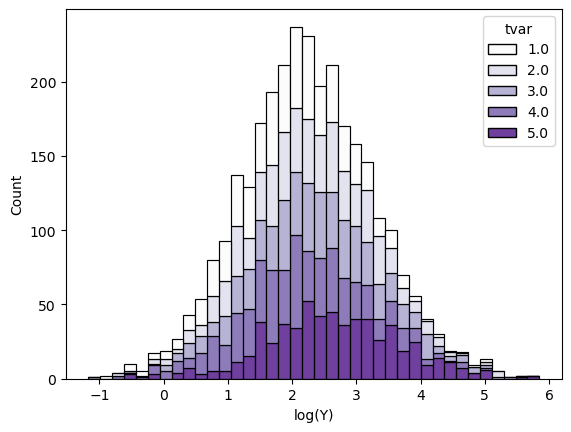

In [21]:
sns.histplot(data = df, x = 'y', hue =  'tvar', multiple = 'stack', palette = 'Purples')

plt.xlabel('log(Y)')

In [22]:
def y(K, L):
    return L^0.35*K^0.51

def K(L):
    return (10/(L**0.35))**(1/0.51)

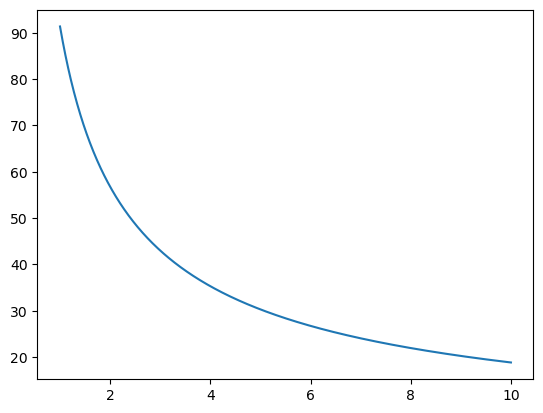

In [23]:
L = np.linspace(1, 10, 1000)

plt.plot(L, K(L))